# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# **Load Dataset**

In [ ]:
df = pd.read_csv('./heart_2022_with_nans.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


# **Learn more about the data**

In [ ]:
df.shape

(445132, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

# **In the data above, there is an inconsistency in the number of entries across the features. Check if there are any NaN values in the data.**

In [ ]:
df.isna().values.any()

True

In [ ]:
df.isna().values.sum()

902665

In [ ]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


# **In this section, I split the data with x as the feature columns and y as the target variable**

In [ ]:
x = df.drop(columns = ['HadHeartAttack','RaceEthnicityCategory','RemovedTeeth','State'])
y = df['HadHeartAttack']

# **Handling missing value**

In [ ]:
df_Nan = x.isnull().sum().reset_index()
df_Nan.columns = ['Columns','Missing Values']
df_Nan = df_Nan[df_Nan['Missing Values'] > 0]
print(df_Nan)

                      Columns  Missing Values
1               GeneralHealth            1198
2          PhysicalHealthDays           10927
3            MentalHealthDays            9067
4             LastCheckupTime            8308
5          PhysicalActivities            1093
6                  SleepHours            5453
7                   HadAngina            4405
8                   HadStroke            1557
9                   HadAsthma            1773
10              HadSkinCancer            3143
11                    HadCOPD            2219
12      HadDepressiveDisorder            2812
13           HadKidneyDisease            1926
14               HadArthritis            2633
15                HadDiabetes            1087
16        DeafOrHardOfHearing           20647
17    BlindOrVisionDifficulty           21564
18    DifficultyConcentrating           24240
19          DifficultyWalking           24012
20  DifficultyDressingBathing           23915
21          DifficultyErrands     

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        445132 non-null  object 
 1   GeneralHealth              443934 non-null  object 
 2   PhysicalHealthDays         434205 non-null  float64
 3   MentalHealthDays           436065 non-null  float64
 4   LastCheckupTime            436824 non-null  object 
 5   PhysicalActivities         444039 non-null  object 
 6   SleepHours                 439679 non-null  float64
 7   HadAngina                  440727 non-null  object 
 8   HadStroke                  443575 non-null  object 
 9   HadAsthma                  443359 non-null  object 
 10  HadSkinCancer              441989 non-null  object 
 11  HadCOPD                    442913 non-null  object 
 12  HadDepressiveDisorder      442320 non-null  object 
 13  HadKidneyDisease           44

In [ ]:
df_object = x.select_dtypes(include=['object']).columns

for col in df_object:
  modus_value = x[col].mode()[0]
  print(f"Modus of column {col}: {modus_value}")

Modus of column Sex: Female
Modus of column GeneralHealth: Very good
Modus of column LastCheckupTime: Within past year (anytime less than 12 months ago)
Modus of column PhysicalActivities: Yes
Modus of column HadAngina: No
Modus of column HadStroke: No
Modus of column HadAsthma: No
Modus of column HadSkinCancer: No
Modus of column HadCOPD: No
Modus of column HadDepressiveDisorder: No
Modus of column HadKidneyDisease: No
Modus of column HadArthritis: No
Modus of column HadDiabetes: No
Modus of column DeafOrHardOfHearing: No
Modus of column BlindOrVisionDifficulty: No
Modus of column DifficultyConcentrating: No
Modus of column DifficultyWalking: No
Modus of column DifficultyDressingBathing: No
Modus of column DifficultyErrands: No
Modus of column SmokerStatus: Never smoked
Modus of column ECigaretteUsage: Never used e-cigarettes in my entire life
Modus of column ChestScan: No
Modus of column AgeCategory: Age 65 to 69
Modus of column AlcoholDrinkers: Yes
Modus of column HIVTesting: No
Mod

In [ ]:
x['Sex'].fillna('Female', inplace=True)
x['GeneralHealth'].fillna('Very good', inplace=True)
x['LastCheckupTime'].fillna('Within past year (anytime less than 12 months ago)', inplace=True)
x['PhysicalActivities'].fillna('Yes', inplace=True)
x['HadAngina'].fillna('No', inplace=True)
x['HadStroke'].fillna('No', inplace=True)
x['HadAsthma'].fillna('No', inplace=True)
x['HadSkinCancer'].fillna('No', inplace=True)
x['HadCOPD'].fillna('No', inplace=True)
x['HadDepressiveDisorder'].fillna('No', inplace=True)
x['HadKidneyDisease'].fillna('No', inplace=True)
x['HadArthritis'].fillna('No', inplace=True)
x['HadDiabetes'].fillna('No', inplace=True)
x['DeafOrHardOfHearing'].fillna('No', inplace=True)
x['BlindOrVisionDifficulty'].fillna('No', inplace=True)
x['DifficultyConcentrating'].fillna('No', inplace=True)
x['DifficultyWalking'].fillna('No', inplace=True)
x['DifficultyDressingBathing'].fillna('No', inplace=True)
x['DifficultyErrands'].fillna('No', inplace=True)
x['SmokerStatus'].fillna('Never smoked', inplace=True)
x['ECigaretteUsage'].fillna('Never used e-cigarettes in my entire life', inplace=True)
x['ChestScan'].fillna('No', inplace=True)
x['AgeCategory'].fillna('Age 65 to 69', inplace=True)
x['AlcoholDrinkers'].fillna('Yes', inplace=True)
x['HIVTesting'].fillna('No', inplace=True)
x['FluVaxLast12'].fillna('Yes', inplace=True)
x['PneumoVaxEver'].fillna('No', inplace=True)
x['TetanusLast10Tdap'].fillna('No, did not receive any tetanus shot in the past 10 years', inplace=True)
x['HighRiskLastYear'].fillna('No', inplace=True)
x['CovidPos'].fillna('No', inplace=True)

<ipython-input-12-566e0ce393cb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['Sex'].fillna('Female', inplace=True)
<ipython-input-12-566e0ce393cb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        445132 non-null  object 
 1   GeneralHealth              445132 non-null  object 
 2   PhysicalHealthDays         434205 non-null  float64
 3   MentalHealthDays           436065 non-null  float64
 4   LastCheckupTime            445132 non-null  object 
 5   PhysicalActivities         445132 non-null  object 
 6   SleepHours                 439679 non-null  float64
 7   HadAngina                  445132 non-null  object 
 8   HadStroke                  445132 non-null  object 
 9   HadAsthma                  445132 non-null  object 
 10  HadSkinCancer              445132 non-null  object 
 11  HadCOPD                    445132 non-null  object 
 12  HadDepressiveDisorder      445132 non-null  object 
 13  HadKidneyDisease           44

In [ ]:
df_Nan = x.isnull().sum().reset_index()
df_Nan.columns = ['Columns','Missing Values']
df_Nan = df_Nan[df_Nan['Missing Values'] > 0]
print(df_Nan)

               Columns  Missing Values
2   PhysicalHealthDays           10927
3     MentalHealthDays            9067
6           SleepHours            5453
26      HeightInMeters           28652
27   WeightInKilograms           42078
28                 BMI           48806


# **Checking outlier on the fiture's data**

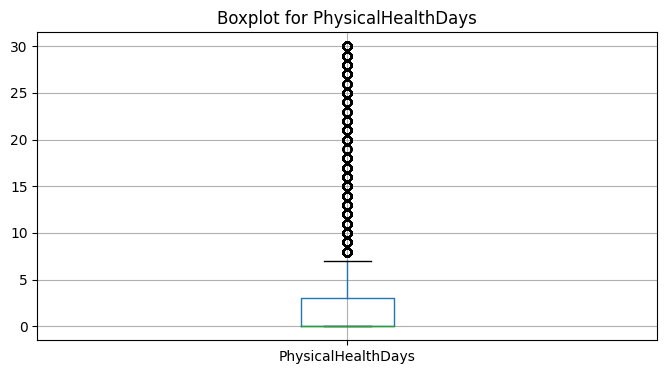

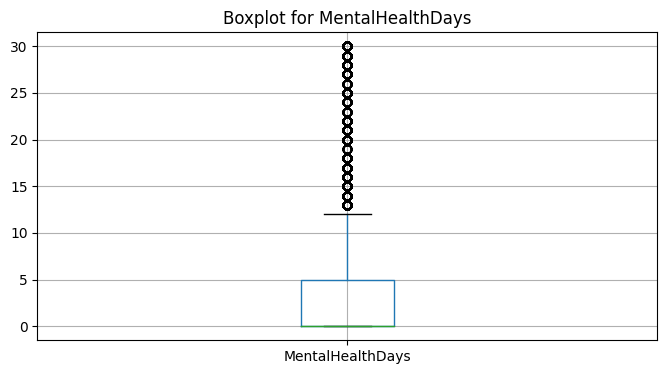

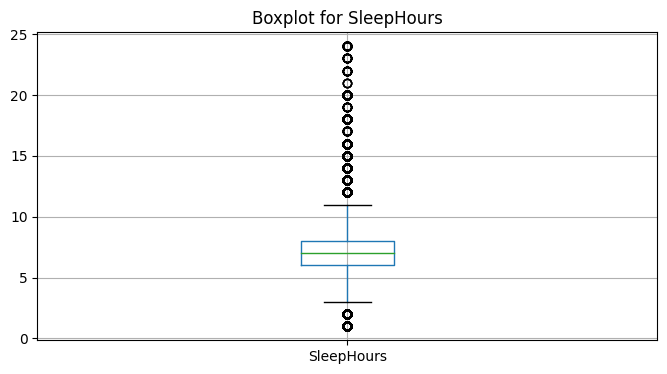

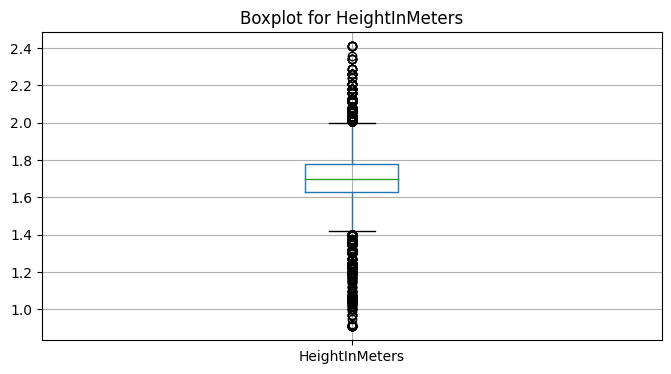

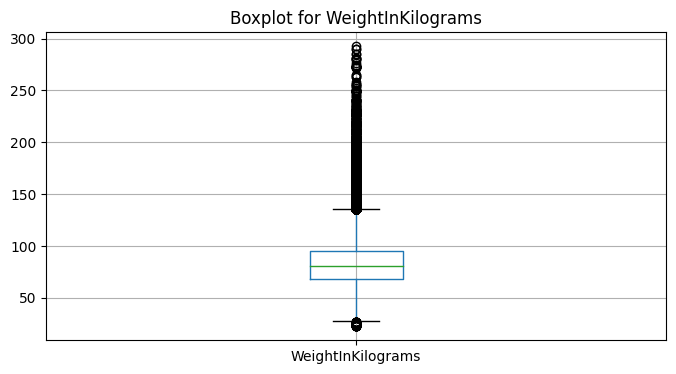

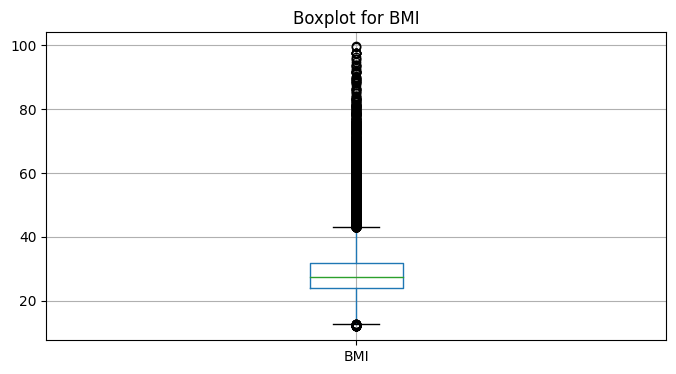

In [ ]:
df_columns = x.select_dtypes(include = ['number']).columns

for col in df_columns:
  plt.figure(figsize=(8,4))
  x.boxplot(column=col)
  plt.title(f'Boxplot for {col}')
  plt.show()

# **Median for numerical fiture's columns**

In [ ]:
df_numerical = x.select_dtypes(include=['number']).columns

for col in df_numerical:
  median_value = x[col].median(0)
  print(f"Median of column {col}: {median_value}")

Median of column PhysicalHealthDays: 0.0
Median of column MentalHealthDays: 0.0
Median of column SleepHours: 7.0
Median of column HeightInMeters: 1.7
Median of column WeightInKilograms: 80.74
Median of column BMI: 27.44


In [ ]:
for col in x.select_dtypes(include=['float64', 'int64']).columns:
    # Calculate the median
    median_value = x[col].median()

    # Replace NaN with the median
    x[col].fillna(median_value, inplace=True)

    # Ensure the column remains as float64
    x[col] = x[col].astype('float64')

<ipython-input-17-b775734ea39a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x[col].fillna(median_value, inplace=True)
<ipython-input-17-b775734ea39a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        445132 non-null  object 
 1   GeneralHealth              445132 non-null  object 
 2   PhysicalHealthDays         445132 non-null  float64
 3   MentalHealthDays           445132 non-null  float64
 4   LastCheckupTime            445132 non-null  object 
 5   PhysicalActivities         445132 non-null  object 
 6   SleepHours                 445132 non-null  float64
 7   HadAngina                  445132 non-null  object 
 8   HadStroke                  445132 non-null  object 
 9   HadAsthma                  445132 non-null  object 
 10  HadSkinCancer              445132 non-null  object 
 11  HadCOPD                    445132 non-null  object 
 12  HadDepressiveDisorder      445132 non-null  object 
 13  HadKidneyDisease           44

# **Subtitute the outlier data to median value each column**

In [ ]:
for col in x.select_dtypes(include=['number']).columns:
  Q1 = x[col].quantile(0.25)
  Q3 = x[col].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median_value = x[col].median()

  x[col] = x[col].apply(lambda X: median_value if X < lower_bound or X > upper_bound else X)

  print(x)

           Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0       Female     Very good                 0.0               0.0   
1       Female     Excellent                 0.0               0.0   
2       Female     Very good                 2.0               3.0   
3       Female     Excellent                 0.0               0.0   
4       Female          Fair                 2.0               0.0   
...        ...           ...                 ...               ...   
445127  Female          Good                 0.0               3.0   
445128  Female     Excellent                 2.0               2.0   
445129  Female          Poor                 0.0              30.0   
445130    Male     Very good                 0.0               0.0   
445131    Male     Very good                 0.0               1.0   

                                          LastCheckupTime PhysicalActivities  \
0       Within past year (anytime less than 12 months ...                 No   

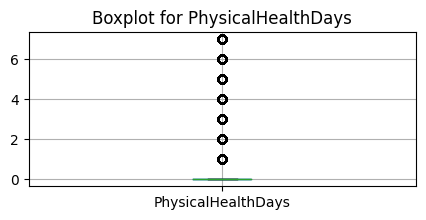

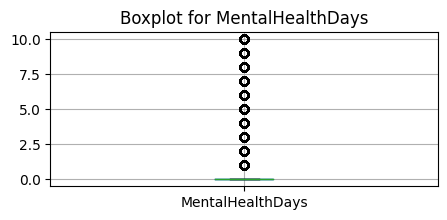

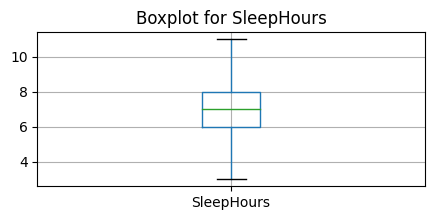

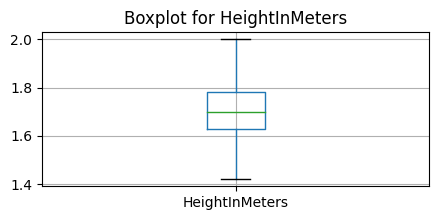

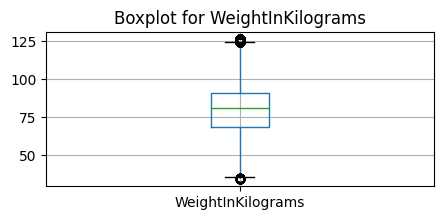

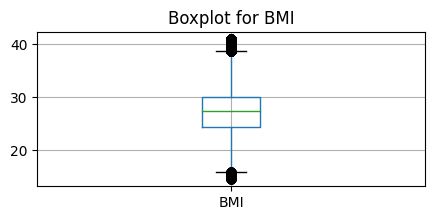

In [ ]:
df_columns = x.select_dtypes(include = ['number']).columns

for col in df_columns:
  plt.figure(figsize=(5,2))
  x.boxplot(column=col)
  plt.title(f'Boxplot for {col}')
  plt.show()

# **Handling missing value pada target variable**

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 445132 entries, 0 to 445131
Series name: HadHeartAttack
Non-Null Count   Dtype 
--------------   ----- 
442067 non-null  object
dtypes: object(1)
memory usage: 3.4+ MB


In [ ]:
print(type(y))

<class 'pandas.core.series.Series'>


In [ ]:
nan_count = y.isna().sum()
print(f"Number of NaN values in 'HadHeartAttack': {nan_count}")

Number of NaN values in 'HadHeartAttack': 3065


In [ ]:
if not y.mode().empty:
  modus_value = y.mode()[0]
  print(f"Modus of 'hadHeartAttack': {modus_value}")

Modus of 'hadHeartAttack': No


In [ ]:
y.fillna('No', inplace=True)

In [ ]:
# LabelEncoder to the dataframe
label_encoder = LabelEncoder()

for i in x:
  if x[i].dtypes == 'object':
    x[i] = label_encoder.fit_transform(x[i])

In [ ]:
# LabelEncoder to the Series
label_encoder = LabelEncoder()

# Transform the Series 'y'
y = label_encoder.fit_transform(y)

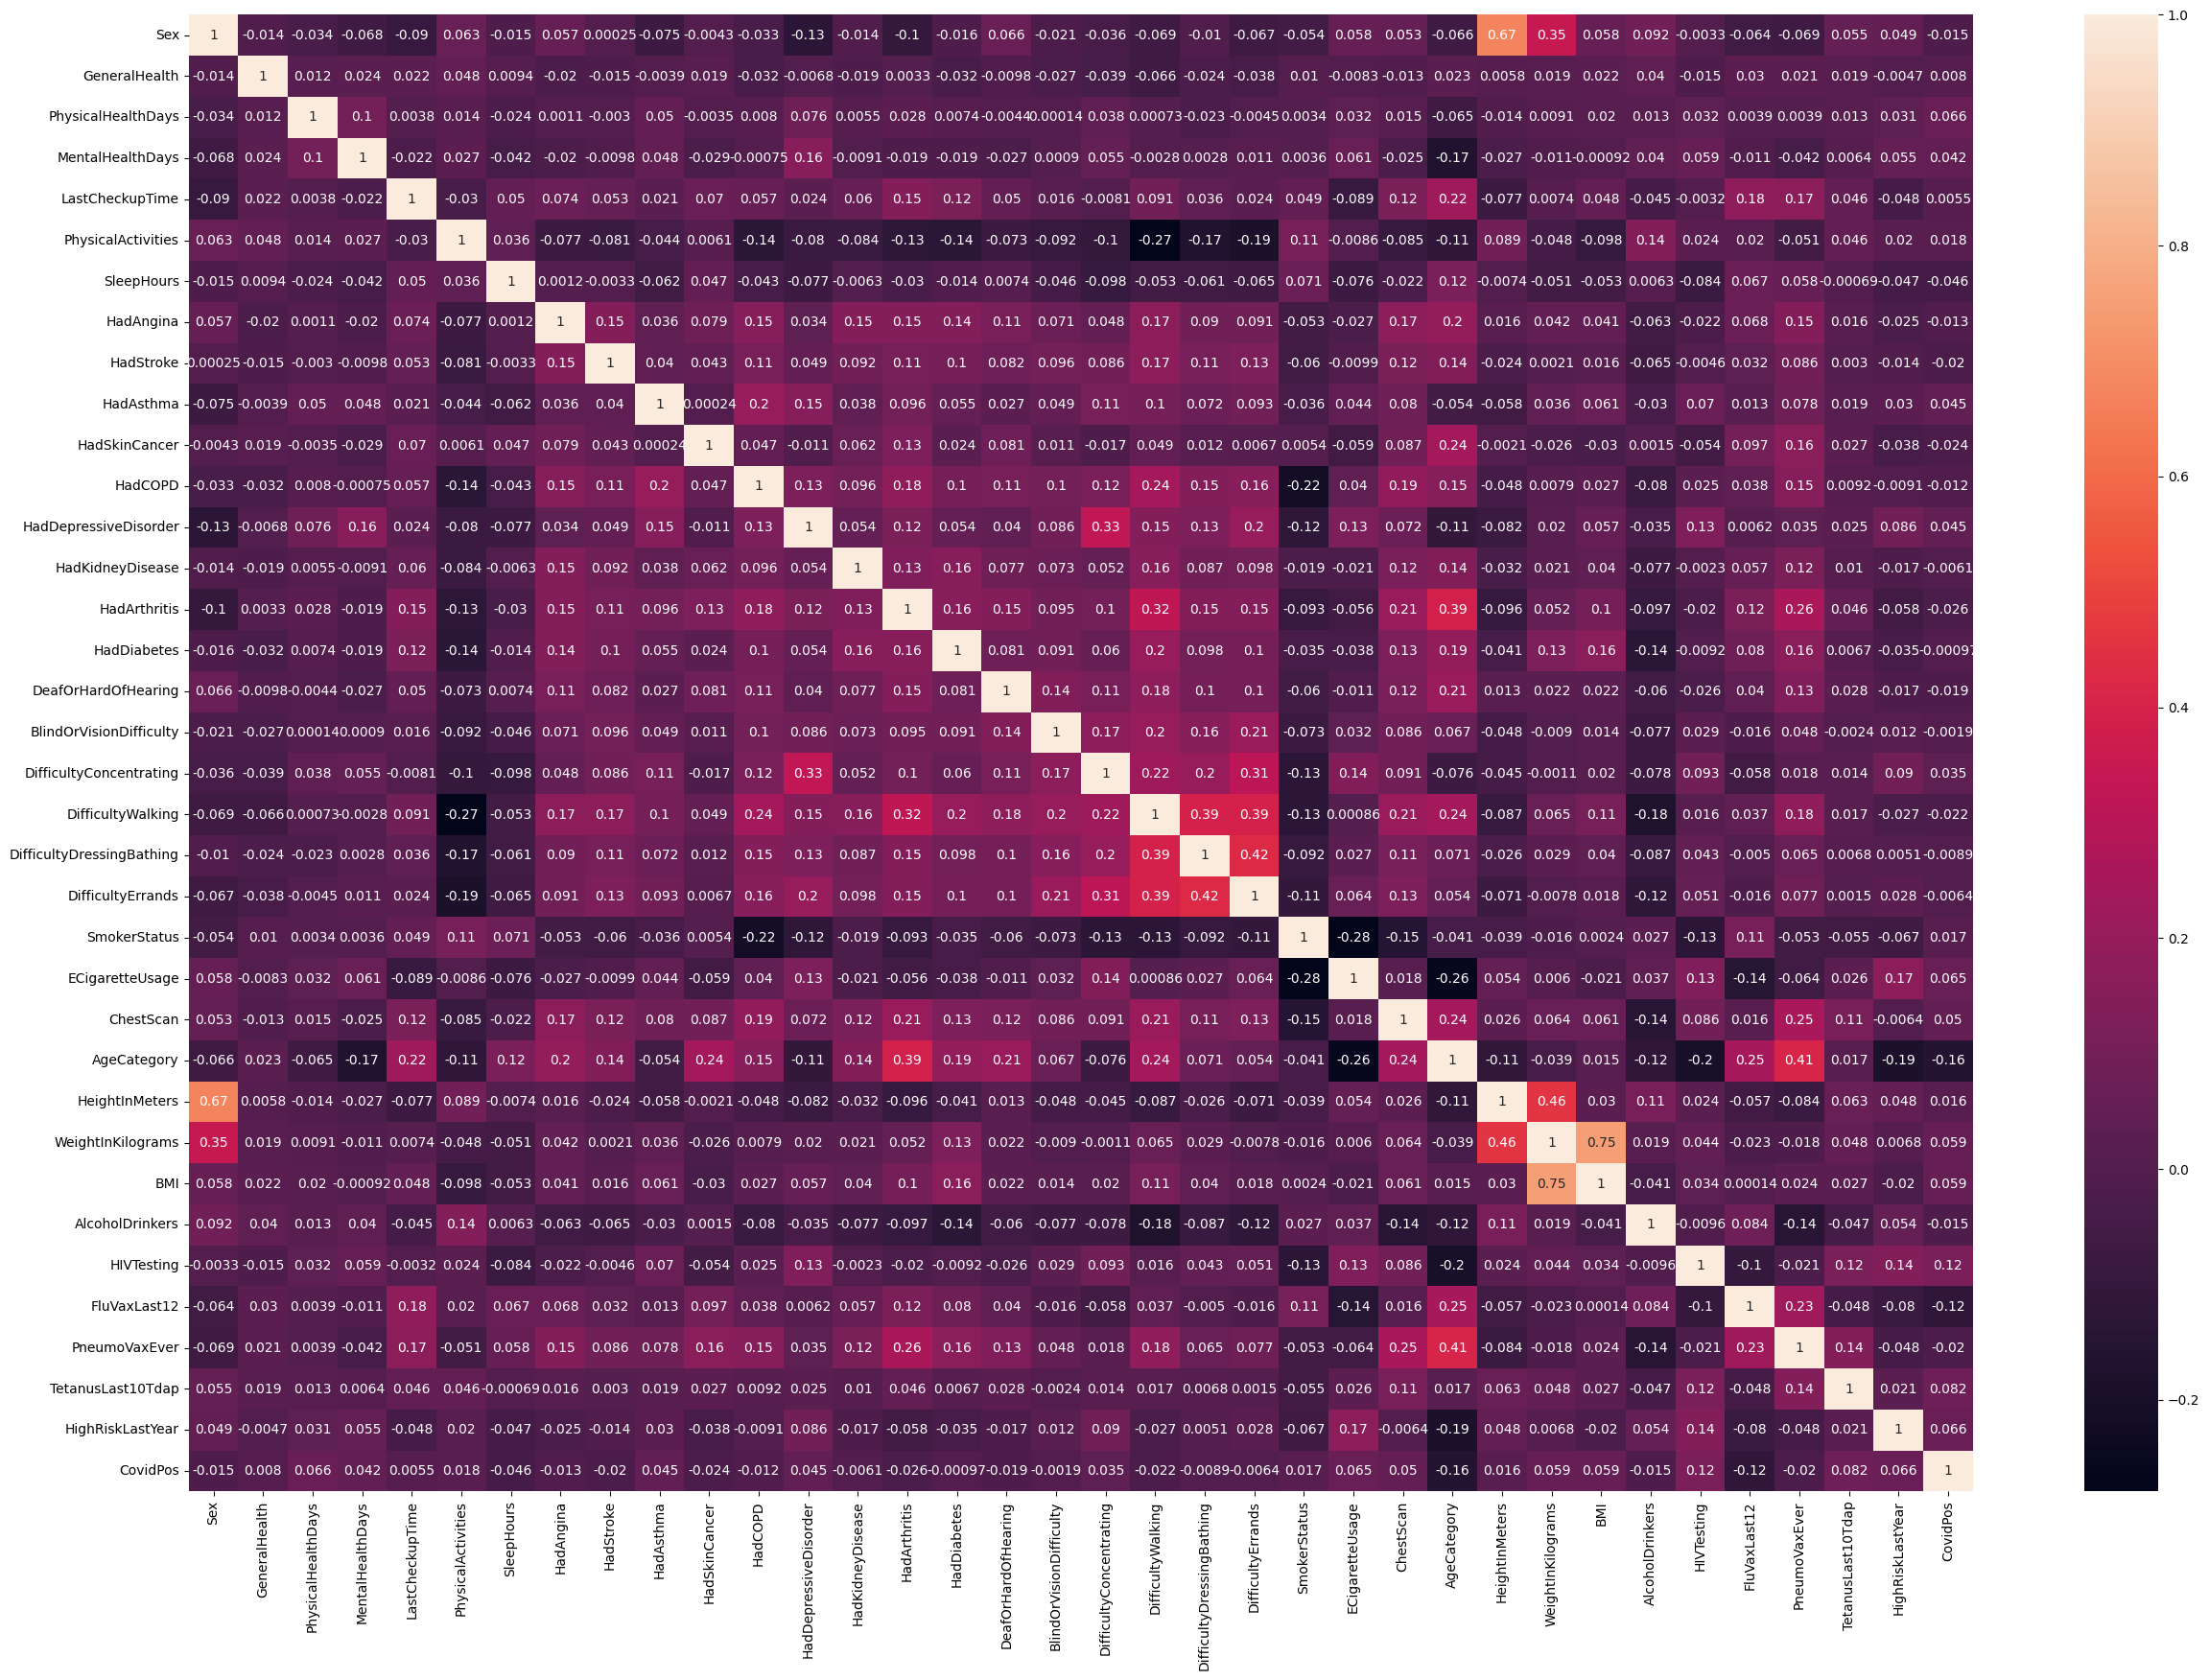

In [ ]:
plt.figure(figsize = (30,20))
sns.heatmap(x.corr(), annot=True)
plt.show()

# **Spliting data**

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

# **Decision Tree**

In [ ]:
dtModel = DecisionTreeClassifier()
dtModel.fit(x_train, y_train)

y_predict_dt = dtModel.predict(x_test)
accuracyDT = accuracy_score(y_test, y_predict_dt)

print("Accuracy by Decision Tree:", accuracyDT * 100,"%")
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_predict_dt))

Accuracy by Decision Tree: 90.88029474204454 %
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95     83889
           1       0.25      0.29      0.27      5138

    accuracy                           0.91     89027
   macro avg       0.60      0.62      0.61     89027
weighted avg       0.92      0.91      0.91     89027



# **Random Forest**

In [ ]:
rfModel = RandomForestClassifier(n_estimators = 100)
rfModel.fit(x_train,y_train)

y_predict_rf = rfModel.predict(x_test)
accuracyRF = accuracy_score(y_test, y_predict_rf)

print("Accuracy by Random Forest:", accuracyRF* 100,"%")
print("\n")
print("Classification Report for Random Forest:\n", classification_report(y_test, y_predict_rf))

Accuracy by Random Forest: 94.44887506037493 %


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     83889
           1       0.56      0.18      0.27      5138

    accuracy                           0.94     89027
   macro avg       0.76      0.59      0.62     89027
weighted avg       0.93      0.94      0.93     89027



# **Logistic Regression**

In [ ]:
logregModel = LogisticRegression()
logregModel.fit(x_train,y_train)

y_predict_LogReg = logregModel.predict(x_test)
accuracyLOGREG = accuracy_score(y_test, y_predict_LogReg)

print("Accuracy by Logistic Regression:", accuracyLOGREG * 100, "%")
print("\n")
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_predict_LogReg))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy by Logistic Regression: 94.47583317420558 %


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     83889
           1       0.55      0.22      0.32      5138

    accuracy                           0.94     89027
   macro avg       0.75      0.61      0.64     89027
weighted avg       0.93      0.94      0.93     89027



# **K-Nearest Neighbors (KNN)**

In [ ]:
knnModel = KNeighborsClassifier(n_neighbors=5)
knnModel.fit(x_train, y_train)

y_predict_KNN = knnModel.predict(x_test)
accuracyKNN = accuracy_score(y_test, y_predict_KNN)
print("Accuracy by KNN:", accuracyKNN * 100, "%")
print("\n")
print("Classification Report for KNN:\n", classification_report(y_test, y_predict_KNN))

Accuracy by KNN: 94.09841958057667 %


Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     83889
           1       0.35      0.03      0.05      5138

    accuracy                           0.94     89027
   macro avg       0.65      0.51      0.51     89027
weighted avg       0.91      0.94      0.92     89027



# **XGBoost Classifier**

In [ ]:
xgbModel = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgbModel.fit(x_train, y_train)

y_predict_xgb = xgbModel.predict(x_test)
accuracyXGB = accuracy_score(y_test, y_predict_xgb)

print("Accuracy by XGBClassifer:", accuracyXGB * 100 , "%")
print("\n")
print("Classification Report for XGBoost:\n", classification_report(y_test, y_predict_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:13:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy by XGBClassifer: 94.4792029384344 %


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     83889
           1       0.55      0.22      0.32      5138

    accuracy                           0.94     89027
   macro avg       0.75      0.61      0.64     89027
weighted avg       0.93      0.94      0.93     89027



<ipython-input-36-8c163a543eb2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_dict.keys()), y=list(accuracy_dict.values()), palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarnin

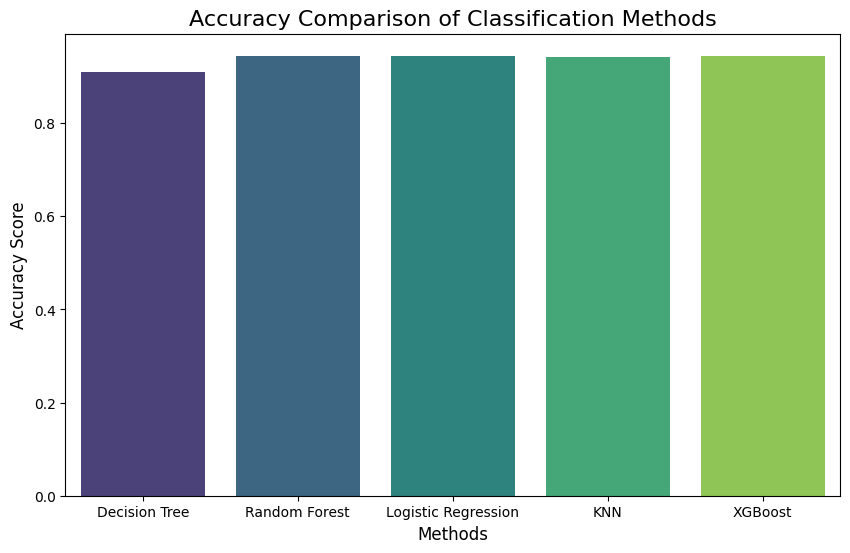

In [ ]:
accuracy_dict = {
    'Decision Tree': accuracy_score(y_test, y_predict_dt),
    'Random Forest': accuracy_score(y_test, y_predict_rf),
    'Logistic Regression': accuracy_score(y_test, y_predict_LogReg),
    'KNN': accuracy_score(y_test, y_predict_KNN),
    'XGBoost': accuracy_score(y_test,y_predict_xgb)
}

# Resize the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(accuracy_dict.keys()), y=list(accuracy_dict.values()), palette='viridis')


# Title dan label
plt.title('Accuracy Comparison of Classification Methods', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xlabel('Methods', fontsize=12)

# Display the plot
plt.show()

# **Conclusion**
In the Classification method above, the model provides a good accuracy with an average of 94%, except for the Decision Tree method, which has an accuracy of 90%. An interesting observation can be made in the Classification Report, where each method has a low precision for class 1 / Yes (HadHeartAttack). It is clear from the data that the model performs better at predicting "No HadHeartAttack" rather than "Yes HadHeartAttack".

A possible solution would be to obtain more balanced data and reduce the NaN values in the raw data so that the model can work with a more diverse dataset.